In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
data = pd.read_csv('trade_results.csv')
data.head()

,CMZ Code,Flexibility Product,Trade Opportunity Name,Trade Window Name,Delivery Start Date,Delivery End Date,Service Days,Delivery Start Time,Delivery End Time,Tendered Capacity [kW],...,Trade Outcome,Accepted Capacity [kW],Awarded Availability Price,Awarded Utilisation Price,Awarded Sustain Price,Technology Type,Number of Assets,Total Asset Installed Capacity,Available for Restore,Restore Price
0,CMZ_LV_T7A_EM_870594,Sustain,Winter 2024/25 - Sustain - 870594 Seaburn Road...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,135.0,...,Accepted,1.9498,0.0,0.0,22.48,EV charge point,1,1.7500,No,1200
1,CMZ_LV_T7A_EM_870594,Sustain,Winter 2024/25 - Sustain - 870594 Seaburn Road...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,135.0,...,Accepted,1.9498,0.0,0.0,22.48,Household demand,1,0.1998,No,1200
2,CMZ_LV_T7A_EM_870782,Sustain,Winter 2024/25 - Sustain - 870782 Kidsley Park...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,12.0,...,Accepted,1.3700,0.0,0.0,112.69,EV charge point,1,1.3700,No,1200
3,CMZ_LV_T7A_EM_870809,Sustain,Dec 2023 - Feb 2024 - Sustain - 870809 East Ne...,"""Dec 2023 - Feb 2024 """,2023-12-04,2024-03-01,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,66.0,...,Accepted,1.3700,0.0,0.0,34.32,EV charge point,1,1.3700,No,1200
4,CMZ_LV_T7A_EM_870809,Sustain,Winter 2024/25 - Sustain - 870809 East Nelson ...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,82.5,...,Accepted,1.3700,0.0,0.0,36.79,EV charge point,1,1.3700,No,1200


In [114]:
data.shape

(15136, 30)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15136 entries, 0 to 15135
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CMZ Code                             15136 non-null  object 
 1   Flexibility Product                  15136 non-null  object 
 2   Trade Opportunity Name               15136 non-null  object 
 3   Trade Window Name                    15136 non-null  object 
 4   Delivery Start Date                  15136 non-null  object 
 5   Delivery End Date                    15136 non-null  object 
 6   Service Days                         15136 non-null  object 
 7   Delivery Start Time                  15136 non-null  object 
 8   Delivery End Time                    15136 non-null  object 
 9   Tendered Capacity [kW]               15136 non-null  float64
 10  Tendered Ceiling Availability Price  15136 non-null  float64
 11  Tendered Ceiling Utilisation

In [118]:
data['Delivery End Time'] = pd.to_datetime(data['Delivery End Time'], infer_datetime_format=True)
data.sample(5)

/var/folders/88/yyywxk6s0czcp29w6d5_st6c0000gn/T/ipykernel_76405/3659868449.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Delivery End Time'] = pd.to_datetime(data['Delivery End Time'], infer_datetime_format=True)
/var/folders/88/yyywxk6s0czcp29w6d5_st6c0000gn/T/ipykernel_76405/3659868449.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Delivery End Time'] = pd.to_datetime(data['Delivery End Time'], infer_datetime_format=True)


,CMZ Code,Flexibility Product,Trade Opportunity Name,Trade Window Name,Delivery Start Date,Delivery End Date,Service Days,Delivery Start Time,Delivery End Time,Tendered Capacity [kW],...,Trade Outcome,Accepted Capacity [kW],Awarded Availability Price,Awarded Utilisation Price,Awarded Sustain Price,Technology Type,Number of Assets,Total Asset Installed Capacity,Available for Restore,Restore Price
8279,CMZ_T8A_EM_0042,Secure,T8A - Winter 2024/25 - Secure - Hallcroft Road,"""November 2024""",2024-11-01,2024-11-30,"Monday,Tuesday,Wednesday,Thursday,Friday,Satur...",19:30:00,2024-08-28 20:00:00,180.0,...,Accepted,27.12,366.43,513.00,0.00,"Battery, compressed air system",6,27.12,No,1200
822,CMZ_LV_T7A_WM_781273,Sustain,Dec 2023 - Feb 2024 - Sustain - 781273 Claypit...,"""Dec 2023 - Feb 2024 """,2023-12-04,2024-03-01,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,2024-08-28 20:00:00,13.5,...,Accepted,1.37,0.00,0.00,29.67,EV charge point,1,1.37,No,1200
9183,CMZ_T8A_SWE_0038,Dynamic,T8A - Winter 2024/25 - Dynamic - Feeder Road t...,"""February 2025""",2025-02-01,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday,Sunday",19:00:00,2024-08-28 19:30:00,1000.0,...,Accepted,36.16,2.49,149.43,0.00,"Battery, compressed air system",8,36.16,No,1200
2049,CMZ_T4A_SWA_0001,Dynamic,T8A - Summer 2024 - Dynamic - Llandrindod - Rh...,"""April 2024""",2024-04-01,2024-04-30,"Monday,Tuesday,Wednesday,Thursday,Saturday,Sunday",19:00:00,2024-08-28 19:30:00,250.0,...,Accepted,37.29,6.47,388.32,0.00,Air source heat pump,3,8.52,No,1200
6763,CMZ_T7B_SWA_0012,Secure,T8A - Summer 2024 - Secure - Ashgrove,"""September 2024""",2024-09-01,2024-09-30,"Monday,Tuesday,Wednesday,Thursday,Friday,Satur...",11:00:00,2024-08-28 11:30:00,300.0,...,Accepted,121.61,2.86,4.00,0.00,"Battery, compressed air system",9,40.68,No,1200


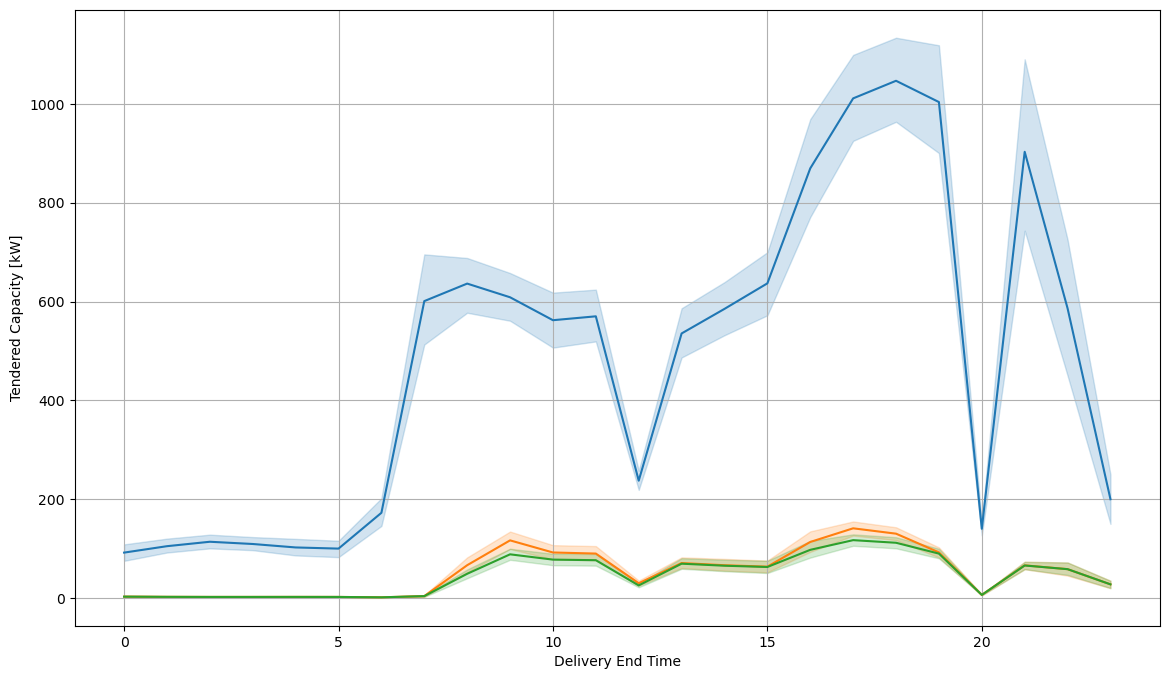

In [124]:
fig, ax = plt.subplots(figsize=(14,8))

for feature in ['Tendered Capacity [kW]', 'Offered Capacity [kW]', 'Accepted Capacity [kW]']:
    sns.lineplot(data=data, x=data['Delivery End Time'].dt.hour, y=feature, ax=ax, legend=True)
    plt.grid(True)
plt.show()

<Axes: ylabel='Technology Type'>

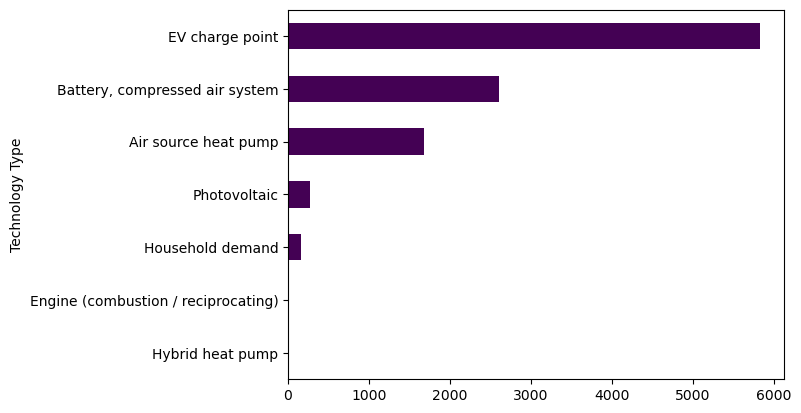

In [125]:
data['Technology Type'].value_counts().sort_values().plot(kind='barh', colormap='viridis')

In [126]:

def display_table(index, columns, values, agg_func='sum', margins_name='Total'):
    print(f'Table showing "{index}" by "{columns}" with {agg_func} of "{values}"\n')
    return data.pivot_table(columns=columns, index=index, values=values,
                 aggfunc=agg_func,
                 margins=True,
                 margins_name=margins_name,
                 fill_value=0).round(2)
    
display_table(columns='Technology Type', index='Company Name', values='Number of Assets')

Table showing "Company Name" by "Technology Type" with sum of "Number of Assets"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total
Company Name,,,,,,,,
Axle Energy Limited,0,992,42345,0,0,18,0,43355
Conrad Energy Limited,0,0,0,10,0,0,0,10
EV DOT ENERGY LTD,0,0,4959,0,0,0,0,4959
East Langford Solar Limited,0,0,0,0,0,0,276,276
Electric Miles Ltd,0,0,344,0,0,0,0,344
Equiwatt Ltd.,0,0,0,0,3708,0,0,3708
Levelise Limited,0,3797,0,0,0,0,0,3797
OVO Energy Ltd,0,0,46,0,290,0,0,336
Octopus Energy Limited,5569,23598,141240,0,0,0,0,170407


In [127]:
display_table(index='Company Name', columns='Technology Type', values='Offered Capacity [kW]')

Table showing "Company Name" by "Technology Type" with sum of "Offered Capacity [kW]"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total
Company Name,,,,,,,,
Axle Energy Limited,0.00,50.00,52216.17,0.0,0.00,57.95,0.0,52324.12
Conrad Energy Limited,0.00,0.00,0.00,2060.0,0.00,0.00,0.0,2060.00
EV DOT ENERGY LTD,0.00,0.00,5188.00,0.0,0.00,0.00,0.0,5188.00
East Langford Solar Limited,0.00,0.00,0.00,0.0,0.00,0.00,69650.0,69650.00
Electric Miles Ltd,0.00,0.00,397.80,0.0,0.00,0.00,0.0,397.80
Equiwatt Ltd.,0.00,0.00,0.00,0.0,890.00,0.00,0.0,890.00
Levelise Limited,0.00,8598.00,0.00,0.0,0.00,0.00,0.0,8598.00
OVO Energy Ltd,0.00,0.00,94.44,0.0,130.09,0.00,0.0,224.53
Octopus Energy Limited,248682.97,259124.95,266909.49,0.0,0.00,0.00,0.0,774717.41


In [128]:
display_table(index='Company Name', columns='Technology Type', values='Accepted Capacity [kW]')

Table showing "Company Name" by "Technology Type" with sum of "Accepted Capacity [kW]"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total
Company Name,,,,,,,,
Axle Energy Limited,0.00,50.00,52174.57,0.0,0.00,57.95,0.0,52282.52
Conrad Energy Limited,0.00,0.00,0.00,1030.0,0.00,0.00,0.0,1030.00
EV DOT ENERGY LTD,0.00,0.00,5135.00,0.0,0.00,0.00,0.0,5135.00
East Langford Solar Limited,0.00,0.00,0.00,0.0,0.00,0.00,69650.0,69650.00
Electric Miles Ltd,0.00,0.00,356.20,0.0,0.00,0.00,0.0,356.20
Equiwatt Ltd.,0.00,0.00,0.00,0.0,890.00,0.00,0.0,890.00
Levelise Limited,0.00,8598.00,0.00,0.0,0.00,0.00,0.0,8598.00
OVO Energy Ltd,0.00,0.00,94.44,0.0,130.09,0.00,0.0,224.53
Octopus Energy Limited,209127.77,219669.75,227304.29,0.0,0.00,0.00,0.0,656101.81


In [129]:
data['Flexibility Product'].value_counts()

Flexibility Product
Dynamic    5800
Sustain    5293
Secure     4043
Name: count, dtype: int64

In [130]:
data.groupby(['Company Name', 'Technology Type', 'Flexibility Product'])['Restore Price'].count()

Company Name                 Technology Type                      Flexibility Product
Axle Energy Limited          Battery, compressed air system       Secure                    2
                             EV charge point                      Dynamic                1195
                                                                  Secure                  868
                                                                  Sustain                 373
                             Hybrid heat pump                     Sustain                   8
Conrad Energy Limited        Engine (combustion / reciprocating)  Secure                   10
EV DOT ENERGY LTD            EV charge point                      Dynamic                 288
                                                                  Secure                  106
East Langford Solar Limited  Photovoltaic                         Dynamic                 276
Electric Miles Ltd           EV charge point                      Dy

In [131]:
from tabulate import tabulate

result = data.groupby(['Company Name', 'Technology Type', 'Flexibility Product'])['Restore Price'].count().reset_index(name='Count')
print(tabulate(result, headers='keys', tablefmt='psql'))

+----+-----------------------------+-------------------------------------+-----------------------+---------+
|    | Company Name                | Technology Type                     | Flexibility Product   |   Count |
|----+-----------------------------+-------------------------------------+-----------------------+---------|
|  0 | Axle Energy Limited         | Battery, compressed air system      | Secure                |       2 |
|  1 | Axle Energy Limited         | EV charge point                     | Dynamic               |    1195 |
|  2 | Axle Energy Limited         | EV charge point                     | Secure                |     868 |
|  3 | Axle Energy Limited         | EV charge point                     | Sustain               |     373 |
|  4 | Axle Energy Limited         | Hybrid heat pump                    | Sustain               |       8 |
|  5 | Conrad Energy Limited       | Engine (combustion / reciprocating) | Secure                |      10 |
|  6 | EV DOT ENERG

In [132]:
display_table(columns='Technology Type', index='Company Name', margins_name='Total Price', values='Restore Price')

Table showing "Company Name" by "Technology Type" with sum of "Restore Price"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total Price
Company Name,,,,,,,,
Axle Energy Limited,0,2400,2923200,0,0,9600,0,2935200
Conrad Energy Limited,0,0,0,12000,0,0,0,12000
EV DOT ENERGY LTD,0,0,472800,0,0,0,0,472800
East Langford Solar Limited,0,0,0,0,0,0,331200,331200
Electric Miles Ltd,0,0,123600,0,0,0,0,123600
Equiwatt Ltd.,0,0,0,0,36000,0,0,36000
Levelise Limited,0,974400,0,0,0,0,0,974400
OVO Energy Ltd,0,0,48000,0,158400,0,0,206400
Octopus Energy Limited,2018400,2151600,3422400,0,0,0,0,7592400


In [133]:
display_table(columns='Flexibility Product', index='Company Name', margins_name='Total Price', values='Restore Price')

Table showing "Company Name" by "Flexibility Product" with sum of "Restore Price"



Flexibility Product,Dynamic,Secure,Sustain,Total Price
Company Name,,,,
0,594000,103200,4774800,5472000
Axle Energy Limited,1434000,1044000,457200,2935200
Conrad Energy Limited,0,12000,0,12000
EV DOT ENERGY LTD,345600,127200,0,472800
East Langford Solar Limited,331200,0,0,331200
Electric Miles Ltd,52800,70800,0,123600
Equiwatt Ltd.,0,36000,0,36000
Levelise Limited,782400,192000,0,974400
OVO Energy Ltd,0,0,206400,206400


In [134]:
display_table(columns='Flexibility Product', index='Company Name', margins_name='Total Price', values='Restore Price', agg_func='sum')

Table showing "Company Name" by "Flexibility Product" with sum of "Restore Price"



Flexibility Product,Dynamic,Secure,Sustain,Total Price
Company Name,,,,
0,594000,103200,4774800,5472000
Axle Energy Limited,1434000,1044000,457200,2935200
Conrad Energy Limited,0,12000,0,12000
EV DOT ENERGY LTD,345600,127200,0,472800
East Langford Solar Limited,331200,0,0,331200
Electric Miles Ltd,52800,70800,0,123600
Equiwatt Ltd.,0,36000,0,36000
Levelise Limited,782400,192000,0,974400
OVO Energy Ltd,0,0,206400,206400


In [135]:
display_table(columns='Technology Type', index='Company Name', margins_name='Total Count', values='Flexibility Product', agg_func='count')

Table showing "Company Name" by "Technology Type" with count of "Flexibility Product"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total Count
Company Name,,,,,,,,
Axle Energy Limited,0,2,2436,0,0,8,0,2446
Conrad Energy Limited,0,0,0,10,0,0,0,10
EV DOT ENERGY LTD,0,0,394,0,0,0,0,394
East Langford Solar Limited,0,0,0,0,0,0,276,276
Electric Miles Ltd,0,0,103,0,0,0,0,103
Equiwatt Ltd.,0,0,0,0,30,0,0,30
Levelise Limited,0,812,0,0,0,0,0,812
OVO Energy Ltd,0,0,40,0,132,0,0,172
Octopus Energy Limited,1682,1793,2852,0,0,0,0,6327


In [136]:
display_table(columns='Flexibility Product', index='Company Name', margins_name='Total Flexibility', values='Technology Type', agg_func='count')

Table showing "Company Name" by "Flexibility Product" with count of "Technology Type"



Flexibility Product,Dynamic,Secure,Sustain,Total Flexibility
Company Name,,,,
0,0,0,0,NaN
Axle Energy Limited,1195,870,381,2446.0
Conrad Energy Limited,0,10,0,10.0
EV DOT ENERGY LTD,288,106,0,394.0
East Langford Solar Limited,276,0,0,276.0
Electric Miles Ltd,44,59,0,103.0
Equiwatt Ltd.,0,30,0,30.0
Levelise Limited,652,160,0,812.0
OVO Energy Ltd,0,0,172,172.0
